In [6]:
from data_loaders import load_and_merge, explode_column

merged_df = load_and_merge()

In [7]:
exploded_df = explode_column(merged_df, "Alleged harmed or nearly harmed parties")

In [8]:
exploded_df.head()

,Namespace,Incident ID,Published,Risk Domain,Risk Subdomain,Entity,Timing,Intent,_id,incident_id,date,reports,Alleged deployer of AI system,Alleged developer of AI system,Alleged harmed or nearly harmed parties,description,title
0,MIT,27,True,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness,Human,Post-deployment,Unintentional,ObjectId(625763df343edc875fe63a19),27,1983-09-26,"[342,343,344,345,346,347,349,350,351,352,353,3...","[""soviet-union""]","[""soviet-union""]",all-life-on-earth,An alert of five incoming intercontinental bal...,Nuclear False Alarm
1,MIT,379,True,"7. AI system safety, failures, and limitations",7.3. Lack of capability or robustness,Human,Post-deployment,Unintentional,ObjectId(636218985a33233a22f6632e),379,1992-05-25,"[2179,2180]","[""pepsi""]","[""d.g.-consultores""]",filipinos,Pepsi's number generation system determining d...,Error in Pepsi's Number Generation System Led ...
2,MIT,42,True,5. Human-Computer Interaction,5.2. Loss of human agency and autonomy,Human,Pre-deployment,Intentional,ObjectId(625763e0343edc875fe63a28),42,1996-04-03,"[759,2471]","[""national-resident-matching-program""]","[""national-resident-matching-program""]",medical-residents,"Alvin Roth, a Ph.D at the University of Pittsb...",Inefficiencies in the United States Resident M...
3,MIT,43,True,1. Discrimination and Toxicity,1.1. Unfair discrimination and misrepresentation,AI,Post-deployment,Unintentional,ObjectId(625763e0343edc875fe63a29),43,1998-03-05,"[762,763,764,765]","[""st-george's-hospital-medical-school""]","[""dr.-geoffrey-franglen""]",women,"From 1982 to 1986, St George's Hospital Medica...",Racist AI behaviour is not a new problem
4,MIT,43,True,1. Discrimination and Toxicity,1.1. Unfair discrimination and misrepresentation,AI,Post-deployment,Unintentional,ObjectId(625763e0343edc875fe63a29),43,1998-03-05,"[762,763,764,765]","[""st-george's-hospital-medical-school""]","[""dr.-geoffrey-franglen""]",minority-groups,"From 1982 to 1986, St George's Hospital Medica...",Racist AI behaviour is not a new problem


In [9]:
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Namespace                                2075 non-null   object        
 1   Incident ID                              2075 non-null   int64         
 2   Published                                2075 non-null   bool          
 3   Risk Domain                              2075 non-null   object        
 4   Risk Subdomain                           2075 non-null   object        
 5   Entity                                   2075 non-null   object        
 6   Timing                                   2075 non-null   object        
 7   Intent                                   2075 non-null   object        
 8   _id                                      2075 non-null   object        
 9   incident_id                              

/Users/user/Documents/AI/AI Incidents Forecasting/ai-incident-forecasting/src/forecast_helpers.py:228: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby(["__year", "__cat"])["__val"]
/Users/user/Documents/AI/AI Incidents Forecasting/ai-incident-forecasting/src/forecast_helpers.py:237: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d.groupby([pd.Grouper(key=date_col, freq="MS"), "__cat"])["__val"]
/opt/miniconda3/envs/ai_incident_forecasting/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then 

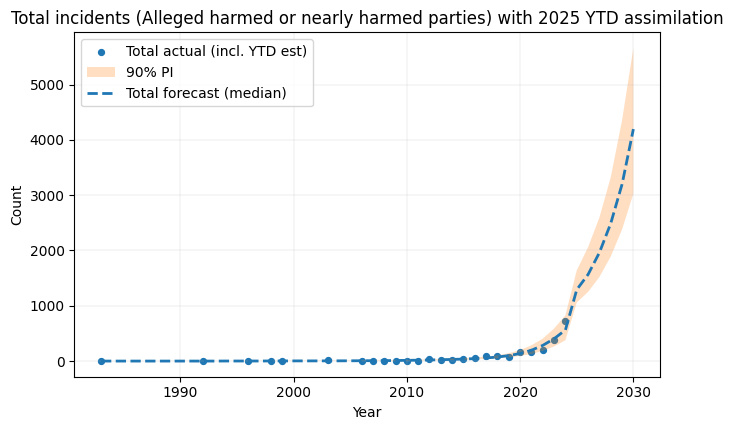

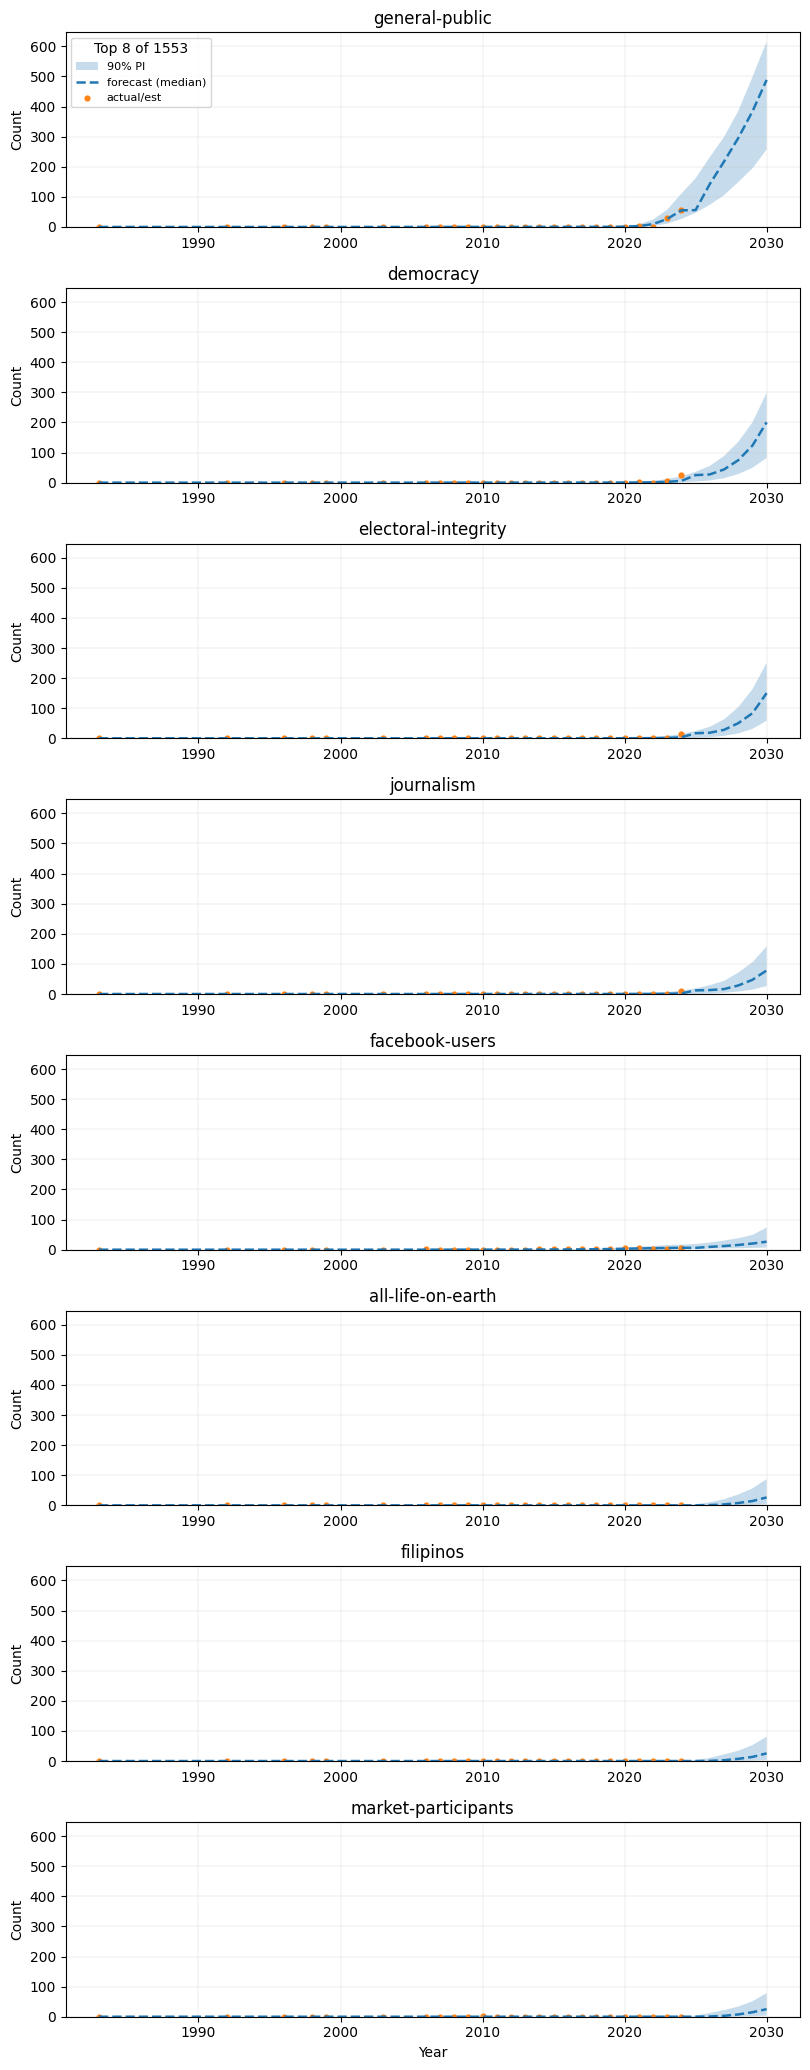

In [11]:
from forecast_helpers import ForecastConfig, forecast_by_category, plot_total_panel, plot_category_panels, plot_category_panels_exploded

cfg = ForecastConfig(YTD_YEAR=2025)
res_rd = forecast_by_category(exploded_df, date_col="date", cat_col="Alleged harmed or nearly harmed parties", config=cfg)
plot_total_panel(res_rd)
plot_category_panels(res_rd, top_k=8)